# Data Acquisition & Management:  Project 2 - Marla Goodman

This project will allow you to demonstrate your ability to: (1) make use of Python’s Pandas library; (2) perform basic
exploratory data analysis on a novel data set; (3) create graphics using Matplotlib and Seaborn as part of your
exploratory data analysis work; and (4) present your work in the form of a more “formal” research paper framework.
Start by selecting a data set to work with: you are free to work with any data set that has not already been used as part of the course work for this class.

### Pre - Work: 

1. Import Numpy and Pandas packages to use throughout the assignment
2. Read data file into the Jupyter Notebook


In [44]:
#import numpy and pandas libraries
import numpy as np
import pandas as pd

In [45]:
#read data file into notebook, assign data to 'stem' dataframe
stem=pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/women-stem.csv')

In [46]:
#view 'stem' dataframe
stem

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000
...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000


### Introduction:

The above data set looks at information about recent college graduates (those under age 28, which is roughly within five years of graduation on a normal schedule). It specifically focuses on students who graduated with a STEM (Science, Technology, Engineering, Math) major. However, this data set contains five different'STEM' categories instead of the traditional four: Engineering, Biology & Life Sciences, Computers & Mathematics, Health, and Physical Sciences.

From this dataset, I can define a few research questions that would be useful, for example, to a recruitment company that helps match potential workers to available jobs. 

A company might want to know which stem majors and major-stem categories put out the most graduates, in order to direct its search to the largest pool of available and potential employees. 

Additionally, the "Women in STEM" initiative has now become an important topic for stem-related companies, who would like to increase the proportion of female employees within their ranks. Therefore, the recruitment company may be asked by these stem-related companies to search for employees in fields where women are scarce. This would be in order to promote women in stem. In this case, the recruitment company would need to know which majors, or major categories have the most and least amount of female graduates.

I'll look to answer the following research questions to aid in the recruitment company's search:

1. Which STEM majors have the most graduates?
2. Which STEM category has the most graduates? 
3. Which STEM majors have the most female graduates? Which have the least? How does it compare to male graduates?



### Data Summary:

The data comes from the American Community Survey Public Use Microdata Sample files for 2010 through 2012. 
It can be found in FiveThirtyEight's Github (https://github.com/fivethirtyeight/data/tree/master/college-majors)

In the data, there are 76 use cases. 

The original 9 attributes are:
1. Rank - ordered 1 to 76 by median earnings, highest to lowest (categorical - ordinal)
2. Major_code - indetifying code to refer to the individual major (categorical - regular)
3. Major - the major's name/description (categorical - regular)
4. Major_category - the STEM field the major falls under (categorical - regular)
5. Total - the total number of graduates with the major (numerical - discrete)
6. Men - the number of male graduates with the major (numerical - discrete) 
7. Women - the number of female graduates with the major (numerical - discrete)
8. ShareWomen - proportion of women graduates with the major --> 'Women' number/'Total' number (numerical-continuous) 
9. Median - median earnings of full-time, year-round worker graduates (numerical - discrete)

For easy comparison between the two genders, I'd like to add a 'MenShare' (proportion of men to the total) column to the dataset:

In [47]:
#add a new column to stem, titled 'ShareMen'
#For each major, divide 'Men' value by 'Total' value
stem['ShareMen']=(stem['Men']/stem['Total'])

In [48]:
#show stem dataframe
stem

,Rank,Major_code,Major,Major_category,Total,Men,Women,ShareWomen,Median,ShareMen
0,1,2419,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.120564,110000,0.879436
1,2,2416,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.101852,75000,0.898148
2,3,2415,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.153037,73000,0.846963
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.107313,70000,0.892687
4,5,2418,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.144967,65000,0.855033
...,...,...,...,...,...,...,...,...,...,...
71,72,3604,ECOLOGY,Biology & Life Science,9154,3878,5276,0.576360,33000,0.423640
72,73,6109,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.721866,33000,0.278134
73,74,6100,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.774577,32400,0.225423
74,75,6102,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.967998,28000,0.032002


I'd also like to remove the columns 'Rank', 'Major_code', and 'Median', as they are not relevant for the analysis:

In [49]:
#deleting 'Major_code', 'Median', and 'Rank' columns
del stem['Major_code']
del stem['Median']
del stem['Rank']

Finally, I will rearrange the columns to have 'ShareMen' come before 'ShareWomen' so that it matches the original order of 'Men' before 'Women':

In [50]:
#rearrange columns in stem dataframe to the order I want them in
pd.DataFrame(stem, columns=['Major','Major_category','Total','Men','Women','ShareMen','ShareWomen'])

,Major,Major_category,Total,Men,Women,ShareMen,ShareWomen
0,PETROLEUM ENGINEERING,Engineering,2339,2057,282,0.879436,0.120564
1,MINING AND MINERAL ENGINEERING,Engineering,756,679,77,0.898148,0.101852
2,METALLURGICAL ENGINEERING,Engineering,856,725,131,0.846963,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,1258,1123,135,0.892687,0.107313
4,NUCLEAR ENGINEERING,Engineering,2573,2200,373,0.855033,0.144967
...,...,...,...,...,...,...,...
71,ECOLOGY,Biology & Life Science,9154,3878,5276,0.423640,0.576360
72,TREATMENT THERAPY PROFESSIONS,Health,48491,13487,35004,0.278134,0.721866
73,GENERAL MEDICAL AND HEALTH SERVICES,Health,33599,7574,26025,0.225423,0.774577
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,Health,38279,1225,37054,0.032002,0.967998


The final attributes are as follows:

1. Major - the major's name/description (categorical - regular)
2. Major_category - the STEM field the major falls under (categorical - regular)
3. Total - the total number of graduates with the major (numerical - discrete)
4. Men - the number of male graduates with the major (numerical - discrete) 
5. Women - the number of female graduates with the major (numerical - discrete)
6. ShareMen - the proportion of men to the total number of graduates with the major (numerical - continuous)
7. ShareWomen - the proportion of women to the total number of graduates with the major (numerical - continuous)

### Exploratory Data Analysis:

To do the analysis, I'll bring in the matplotlib library:

In [51]:
#bringing in matplotlib
%matplotlib notebook

In [52]:
#importing matplotlib library as plt
import matplotlib.pyplot as plt

The EDA will start with the first attribute in the dataframe,'Major':

#### Attribute 1: Major

In [53]:
#bringing back summary statistics for 'Major' values
stem['Major'].describe()

count               76
unique              76
top       OCEANOGRAPHY
freq                 1
Name: Major, dtype: object

We have 76 unique majors in this column; therefore, each major appears only once.

Now I'll create a chart for the attribute:

<IPython.core.display.Javascript object>


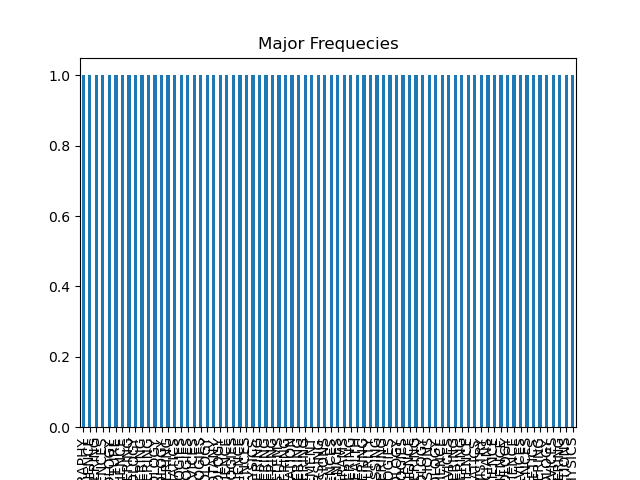

In [54]:
#creating a space for the graph
fig=plt.figure(1)
#counting the frequecies of each 'Major' value, and assigning it to VC
VC=(stem['Major'].value_counts())
#plot VC in a bar chart
#give it a title
VC.plot.bar(title='Major Frequecies')

This plot makes sense. Each major only appears one time, which is why all majors on the chart reach the one mark.
It doesn't make sense to plot this information further using seaborn. The only thing we can glean for this attribute from any descriptive statistics or graphs, is that there are 76 unique majors, each appearing just one time in the data set.

#### Attribute 2: Major Category

In [55]:
#bringing back summary statistics for 'Major_category' values
stem['Major_category'].describe()

count              76
unique              5
top       Engineering
freq               29
Name: Major_category, dtype: object

There are 76 items within the 'Major_category' column. However, there are only five unique values of major categories, meaning a major can fall into one of those five categories. We also see that the major category of Engineering has the most majors contained within it, at a frequecy of 29.

Now I will plot the data:

<IPython.core.display.Javascript object>


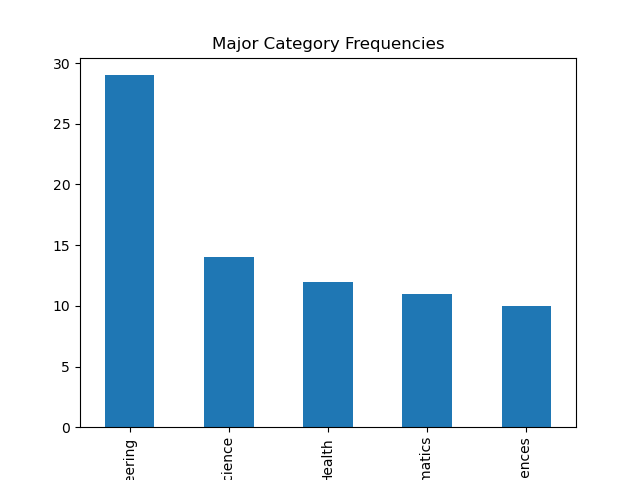

In [56]:
#create a new space for the graph
fig=plt.figure(2)
#counting the frequecies of each 'Major_category' value, and assigning it to VC1
VC1=(stem['Major_category'].value_counts())
#plotting VC1 bar chart
#give it a title
VC1.plot.bar(title='Major Category Frequencies')

I will plot another bar chart with seaborn. But first, I will take out the appropriate data:

In [57]:
#show VC1
VC1

Engineering                29
Biology & Life Science     14
Health                     12
Computers & Mathematics    11
Physical Sciences          10
Name: Major_category, dtype: int64

In [58]:
#made dict of key/values called d, using info from VC1
d = {'Major_Cat': ['Engineering','Bio & Life Sciences','Health','Computers & Math','Physical Sciences'], 'Frequency': [29,14,12,11,10]}
#pass d into a dataframe called df
df = pd.DataFrame(data=d)
#show df
df

,Major_Cat,Frequency
0,Engineering,29
1,Bio & Life Sciences,14
2,Health,12
3,Computers & Math,11
4,Physical Sciences,10


<IPython.core.display.Javascript object>


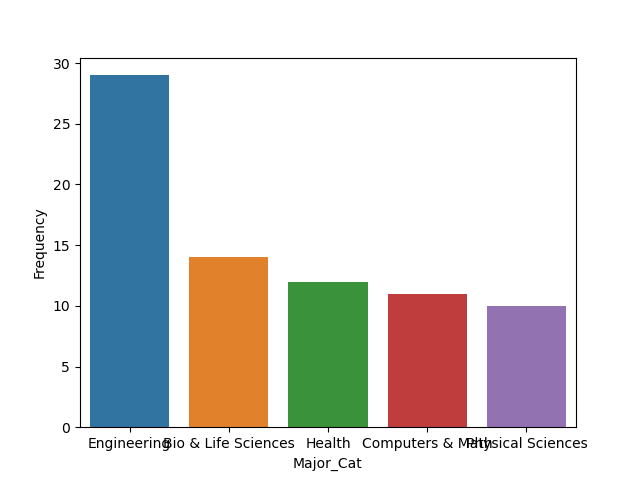

In [59]:
#import seaborn
import seaborn as sns
#create space for graph
fig=plt.figure(3)
#plot df
sns.barplot(x='Major_Cat',y='Frequency',data=df)

With the bar charts, we can visually see what the summary statistics told us before, in that Engineering's frequency stops just below 30 majors, making it the category with the most majors.

However, it goes beyond the summary statistics by showing us the frequencies of the other four categories. We can see that Engineering outstrips the other four in frequencies by nearly double. After Engineering, the rest fall within a similar ballpark to each other.


#### Attribute 3: Total

In [60]:
#bringing back summary statistics for 'Total' column
stem['Total'].describe()

count        76.000000
mean      25515.289474
std       43998.008553
min         609.000000
25%        3782.000000
50%       11047.500000
75%       27509.250000
max      280709.000000
Name: Total, dtype: float64

There are 76 counts of values in this column. Further, we see the major with the lowest amount of graduates has just 609 graduates. The highest amount of graduates within a certain major comes in at 280,709 graduates. This is a large  spreaded range of data. 

Interestingly, with the mean available to us, we can also determine the amount of graduates studied. The mean is the sum of all the items divided by the number of items.
Therefore: 

Mean = (sum of all items/number of items)

25,515 = x / 76

x = Approx. 1.93 million 

Nearly 1.93 million stem graduates were recorded for this dataset (assuming each of these graduates only did that one major and did not do a double major in another stem field).

Now I'll plot this attribute into a histogram and a boxplot:

<IPython.core.display.Javascript object>


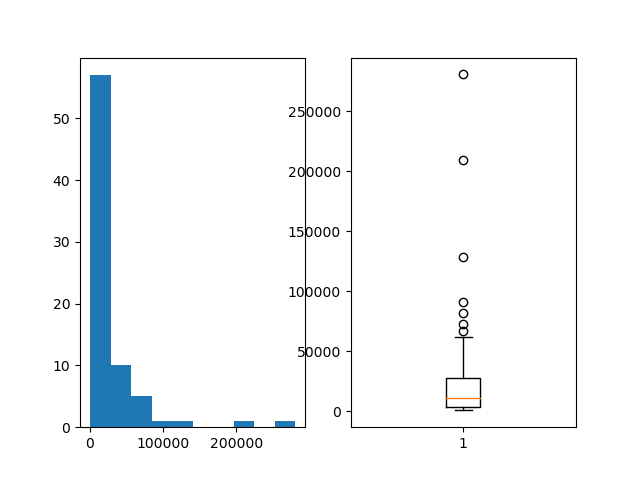

{'whiskers': [<matplotlib.lines.Line2D at 0x1194a52e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1193521c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1194a51c0>],
 'medians': [<matplotlib.lines.Line2D at 0x11acc2be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ad0deb0>],
 'means': []}

In [61]:
#create a new space for the graph
fig=plt.figure(4)
# assign the first subplot in the figure
plt.subplot(121)
#plot a histogram of 'Total' values in the first suplot 
plt.hist(stem['Total'])
# assign the second subplot in the figure
plt.subplot(122)
#plot a boxplot of 'Total' values in the second suplot 
plt.boxplot(stem['Total'])

From both graphs, we can see the data is skewed to the right. Most values of 'Total' are less than 50,000, as can be seen from the tall portion of the histogram. The strength of the boxplot is that the spread and outliers can be seen clearly. At least 75% of the data is kept within the 50,000 value. After that, we have a few outliers between the 50,000 and 100,000 mark. Finally, we have 3 significant outliers after the 100,000 mark. Therefore, most majors have a total of 50,000 graduates or less. A few majors have between 50,000 and 100,000 graduates. Only 3 majors have more than 100,000 graduates. 

I'll also plot the data using Seaborn:

<IPython.core.display.Javascript object>


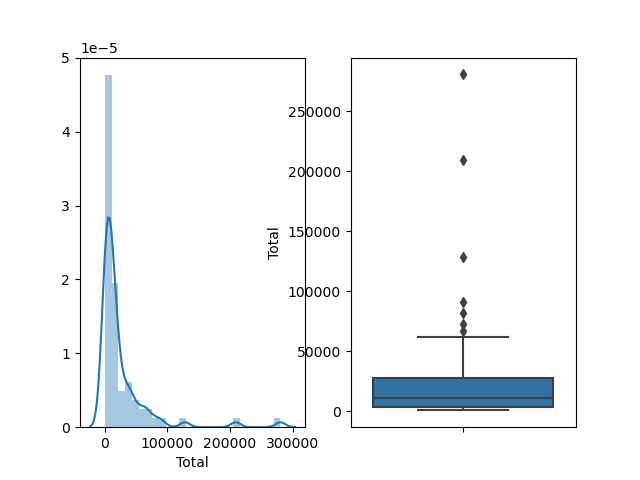

In [62]:
#create space for graphs
fig=plt.figure(5)
#designate subplot
plt.subplot(121)
#plot a histogram of 'Total' values
sns.distplot(stem['Total'])
#designate subplot
plt.subplot(122)
#plot a boxplot of 'Total' values, orient it vertically
sns.boxplot(stem['Total'],orient='v')


Again, we see that the 'Total' data is skewed to the right. Most of the data comes before the 100,000 mark, and a few outliers come after the 100,000 mark.

#### Attributes 4 & 5: Men & Women

In [63]:
#bringing back summary statistics for 'Men' column
stem['Men'].describe()

count        76.000000
mean      12800.763158
std       21307.554101
min         488.000000
25%        2047.750000
50%        4583.000000
75%       11686.500000
max      111762.000000
Name: Men, dtype: float64

In [64]:
#bringing back summary statistics for 'Women' column
stem['Women'].describe()

count        76.000000
mean      12714.526316
std       29056.014723
min          77.000000
25%        1227.500000
50%        5217.500000
75%       12463.500000
max      187621.000000
Name: Women, dtype: float64

The amount of men in this study is mean * count: 76 * 12,800 (approx.) = 972,800.

The amount of women in this study is mean * count: 76 * 12,714 (approx.) = 966,264.

We can see that of the nearly 1.93 million people in this study, just about half of stem majors are men and half are women.

That being said, we can see differences between male and female stem majors. 
The lowest a stem major has of men is 488, while for women that number is 77.
The hightest a stem major has of men is 111,762, while for women that number is 187,621.

The quartiles presented in the summary statistics, and any outliers, will be easier to visualize via graphs (first Matplotlib, then Seaborn):

<IPython.core.display.Javascript object>


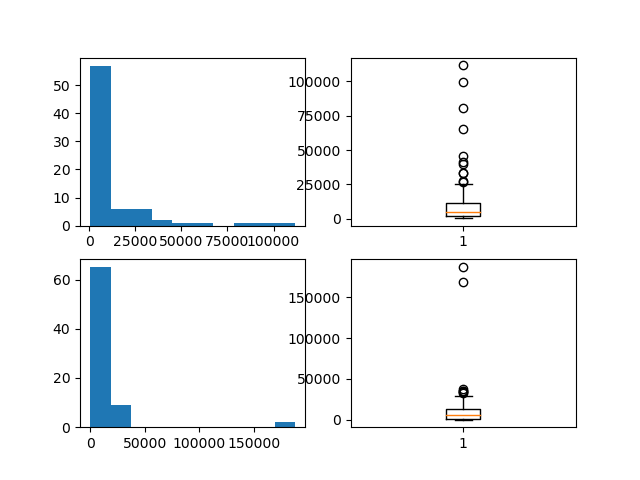

{'whiskers': [<matplotlib.lines.Line2D at 0x11af8e040>,
 'caps': [<matplotlib.lines.Line2D at 0x11af8e700>,
 'boxes': [<matplotlib.lines.Line2D at 0x11af82ca0>],
 'medians': [<matplotlib.lines.Line2D at 0x11af8edc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11af9a100>],
 'means': []}

In [65]:
#create a new space for the graph
fig=plt.figure(6)
# assign the first subplot in the figure
plt.subplot(221)
#plot a histogram of 'Men' values in the first subplot 
plt.hist(stem['Men'])
# assign the second subplot in the figure
plt.subplot(222)
#plot a boxplot of 'Men' values in the second subplot 
plt.boxplot(stem['Men'])
# assign the third subplot in the figure
plt.subplot(223)
#plot a histogram of 'Women' values in the third subplot 
plt.hist(stem['Women'])
# assign the second subplot in the figure
plt.subplot(224)
#plot a boxplot of 'Women' values in the fourth subplot 
plt.boxplot(stem['Women'])

<IPython.core.display.Javascript object>


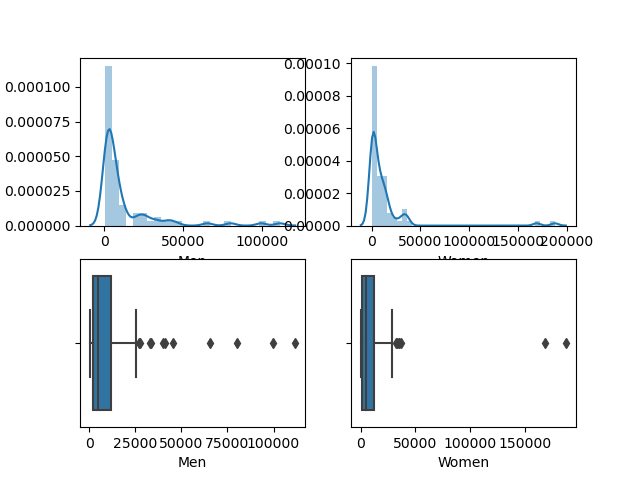

In [66]:
#create space for the graphs
fig=plt.figure(7)
#designate subplot
plt.subplot(221)
#plot sns graph for 'Men' values
sns.distplot(stem['Men'])
#designate subplot
plt.subplot(222)
#plot sns graph for 'Women' values
sns.distplot(stem['Women'])
#designate subplot
plt.subplot(223)
#plot sns boxplot for 'Men' values
sns.boxplot(stem['Men'])
#designate subplot
plt.subplot(224)
#plot sns boxplot for 'Women' values
sns.boxplot(stem['Women'])

From the histograms, we can see that both the men and women data are skewed right. 
Most majors, for both men and women, have less than 50,000 graduates. This is similar to our first attribute - most majors had less than 50,000 graduates total.

The boxplot shows that women's outliers generally stay around the 50,000 mark, except for two in particular that are above 150,000. The men's outliers are more spread out between approx. 25,000 and 110,000 graduates.



#### Attributes 6 & 7: ShareMen and ShareWomen

In [67]:
#bring back summary statistics for 'ShareMen' column
stem['ShareMen'].describe()

count    76.000000
mean      0.563071
std       0.232176
min       0.032002
25%       0.408197
50%       0.594132
75%       0.752082
max       0.922547
Name: ShareMen, dtype: float64

In [68]:
#bring back summary statistics for 'ShareWomen' column
stem['ShareWomen'].describe()

count    76.000000
mean      0.436929
std       0.232176
min       0.077453
25%       0.247918
50%       0.405868
75%       0.591803
max       0.967998
Name: ShareWomen, dtype: float64

The mean of men graduates to total graduates per major is .56. This means that for a major, men on average make up 56% of it. One major in particular (max) is comprised of 92% men, with another having only 3.2% of men (min).
 
The mean of women graduates to total graduates per major is .43. This means that for a major, women on average make up 43% of it. One major in particular (max) is comprised of 97% women, with another having only 7.7% of women (min).

Now I will plot this information with Matplotlib and then Seaborn:

<IPython.core.display.Javascript object>


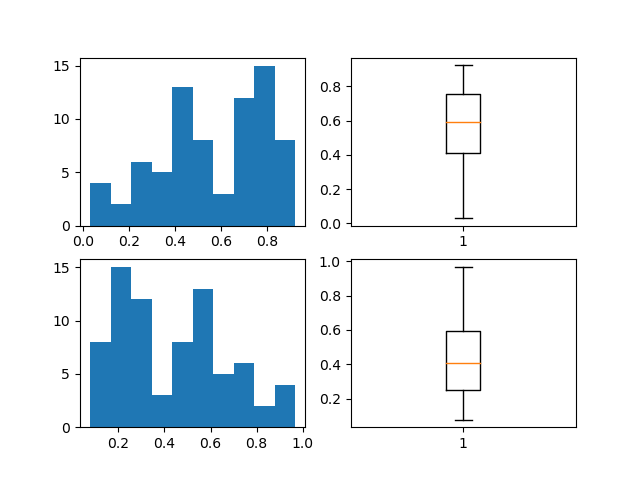

{'whiskers': [<matplotlib.lines.Line2D at 0x11b2344c0>,
 'caps': [<matplotlib.lines.Line2D at 0x11b234b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x11b234160>],
 'medians': [<matplotlib.lines.Line2D at 0x11b23e280>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b23e580>],
 'means': []}

In [69]:
#create a new space for the graph
fig=plt.figure(8)
# assign the first subplot in the figure
plt.subplot(221)
#plot a histogram of 'ShareMen' values in the first subplot 
plt.hist(stem['ShareMen'])
# assign the second subplot in the figure
plt.subplot(222)
#plot a boxplot of 'ShareMen' values in the second subplot 
plt.boxplot(stem['ShareMen'])
# assign the third subplot in the figure
plt.subplot(223)
#plot a histogram of 'ShareWomen' values in the third subplot 
plt.hist(stem['ShareWomen'])
# assign the second subplot in the figure
plt.subplot(224)
#plot a boxplot of 'ShareWomen' values in the fourth subplot 
plt.boxplot(stem['ShareWomen'])

<IPython.core.display.Javascript object>


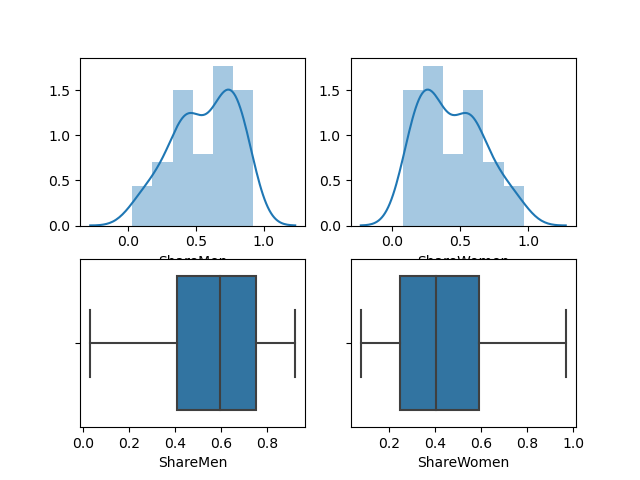

In [70]:
#create space for graph
fig=plt.figure(9)
#designate subplot
plt.subplot(221)
#plot sns graph for 'ShareMen'
sns.distplot(stem['ShareMen'])
#designate subplot
plt.subplot(222)
#plot sns graph for 'ShareWomen'
sns.distplot(stem['ShareWomen'])
#designate subplot
plt.subplot(223)
#plot sns boxplot for 'ShareMen'
sns.boxplot(stem['ShareMen'])
#designate boxplot
plt.subplot(224)
#plot sns boxplot for 'ShareWomen'
sns.boxplot(stem['ShareWomen'])

In the men's histogram we see the information as skewed a little to the left. The proportions near .8 and .4 contain more majors than the other proportions. In the men's boxplot, we see 50% of majors lay between .4 and .8 (50% of the data fall between quartile 1 and quartile 3). 
For the boxplot,both men's and women's, there will be no outliers, since all proportions must fall within 1 (100%).


In the women's histogram we see the information as skewed a little to the right. The proportions near .2 and .6 contain more majors than the other proportions. The boxplot shows 50% of majors between approx. .2 and .6. 

### Inference:

**First research question:** Which STEM majors have the most graduates?

To answer this, I'll use a code to bring back an organized listing of the majors and their total amount of graduates. I will bring back the top five majors with the most graduates.

In [71]:
#create subset of data called total_most
#containing 'Major' and 'Total' columns
total_most=stem[["Major", "Total"]]
#reorder subset from the highest 'Total' value to the lowest
#bring back the first five values
total_most.sort_values(by=['Total'],ascending=False).head()

,Major,Total
70,BIOLOGY,280709
26,NURSING,209394
18,COMPUTER SCIENCE,128319
7,MECHANICAL ENGINEERING,91227
9,ELECTRICAL ENGINEERING,81527


We can see from these results that Biology is the major with the most graduates at 280,709. Nearly 70,000 less graduates major in Nursing. 128,319 graduates make Computer Science the middle major. The fourth and fifth spots are Mechanical Engineering (91,227) and Electrical Engineering (81,527), respectively.

A recruitment company might want to start looking at these specific majors, as they contain the largest pool of graduates. The more people it can match to jobs, the more successful the company is.

**Second research question:** Which STEM major category has the most graduates?

I will write a code that brings back each major category and the amount of graduates from each one. I will limit the results to the top five major categories. 

In [72]:
#creating new subset
total_most_cat=stem[['Major_category', 'Total','Men','Women']]
#grouping the categories by the sum of each one
#sorting it by highest 'Total' to lowest 'Total'
maj_cat=total_most_cat.groupby(['Major_category']).sum().sort_values(by=['Total'],ascending=False)
#show dataframe
maj_cat

,Total,Men,Women
Major_category,,,
Engineering,537583,408307,129276
Health,463230,75517,387713
Biology & Life Science,453862,184919,268943
Computers & Mathematics,299008,208725,90283
Physical Sciences,185479,95390,90089


I will show these results visually with Matplotlib and Seaborn below:

<IPython.core.display.Javascript object>


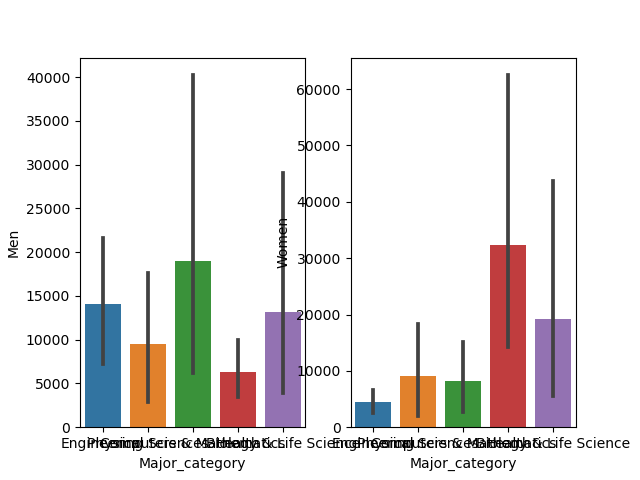

In [73]:
#plot dataframe
maj_cat.plot.bar()

In [74]:
fig=plt.figure(10)
#designate subplot
plt.subplot(121)
#plot sns graph 
sns.barplot(x='Major_category', y='Men', data=stem)
#designate subplot
plt.subplot(122)
#plot sns graph 
sns.barplot(x='Major_category', y='Women', data=stem)

Engineering is the STEM category with the most graduates. The other four in descending order are Health, Biology & Life Sciences, Computer & Mathematics, and Physical Sciences. 

This fits in with our results from question one. There, we saw that two of the most common majors for students are two Engineering majors. Here, we see the Engineering field has the most graduates. There, we saw that a large major is Nursing (which is a part of the category Health). Here, we see Health is the second category with the most graduates. 

If the recruitment company wants to direct its search by category, these are the major categories in which they can find the most graduates.

From these graphs, we can also see that Engineering and Computer & Mathematics are made up of more men, while Health and Bio & Life Sciences are made up of more women. Physical Sciences is most balanced at nearly half and half, with 95,000 men and 90,000 women. This brings us to our third research question.

**Third research question:** Which STEM majors have the most female graduates? Which have the least? How does it compare to male graduates?

To answer this question, I'll use similar code to our first two solutions. However, this time I will bring back all the women graduates and their proportions for each major.

In [75]:
#create dataset with columns 'Major','Women', 'ShareWomen'
women_most=stem[["Major", "Women","ShareWomen"]]
#arrange dataset by 'Women' column, from highest to lowest
#show top 5 results
women_most.sort_values(by=['Women'],ascending=False).head()

,Major,Women,ShareWomen
26,NURSING,187621,0.896019
70,BIOLOGY,168947,0.601858
74,COMMUNICATION DISORDERS SCIENCES AND SERVICES,37054,0.967998
62,MULTI-DISCIPLINARY OR GENERAL SCIENCE,35037,0.564639
72,TREATMENT THERAPY PROFESSIONS,35004,0.721866


Women make up much of Nursing, with 89% of Nursing graduates being female. Additionally, while there are less women in Communication Disorders, their proportion is still 96%. 

If I arrange the subset from lowest to highest amount of female graduates, we can see the top five majors with the least amount of women:

In [76]:
#arrange dataset by 'Women' column, from lowest to highest
#show top 5 results
women_most.sort_values(by=['Women'],ascending=True).head()

,Major,Women,ShareWomen
1,MINING AND MINERAL ENGINEERING,77,0.101852
39,MATHEMATICS AND COMPUTER SCIENCE,109,0.178982
2,METALLURGICAL ENGINEERING,131,0.153037
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,135,0.107313
24,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,232,0.322222


Four out of five of the above majors are engineering based. For three of those four engineering majors, women only make up 10 - 15% of them.

Let us see which majors host the most men:

In [77]:
#create dataset with columns 'Major','Men', 'ShareMen'
men_most=stem[["Major", "Men","ShareMen"]]
#arrange dataset by 'Men' column, from highest to lowest
#assign top 5 results to abc
abc=men_most.sort_values(by=['Men'],ascending=False).head()
#show abc
abc

,Major,Men,ShareMen
70,BIOLOGY,111762,0.398142
18,COMPUTER SCIENCE,99743,0.777305
7,MECHANICAL ENGINEERING,80320,0.880441
9,ELECTRICAL ENGINEERING,65511,0.803550
16,GENERAL ENGINEERING,45683,0.747040


Three out of the five majors with the most male graduates are engineering based. 

If a recruitment company is charged with finding women to apply for male-dominated STEM positions, it might want to look within the Engineering field.

### Conclusion:

In the hypothetical client case, my client (the recruitment company) has a client (a stem-related company) that wants to know where to begin the process of finding appropriate, potential employees to interview and hire. The recruitment company is tasked with this search.

Based on the data, graphs, and research answers I have presented, I would advise the recruitment company to begin its search for graduates in the Engineering field. This category has the most graduates, presenting a large applicant pool for positions. Additionally, if it wants to search by major, the largest Engineering majors are Mechanical and Electrical Engineering. Other majors with a large amount of graduates include Nursing and Biology. 

Nursing and Engineering majors are particularly useful to look at when trying to promote male or female employment within a field. A recruitment company can look to promote women by introducing the few female engineers to employment opportunites. It can also look to promote men by introducing the few male nurses to employment opportunites. 

### Reference(s):

The data collection used in this assignment comes from:

American Community Survey, Public Use Microdata Series (2010-2012), GitHub repository, https://github.com/fivethirtyeight/data/blob/master/college-majors/women-stem.csv

